# Aufgabe 1

In [4]:
import numpy as np

x = np.loadtxt(r"C:/Users/lucar/Documents/Repo/Schule/STAT/oldfaithful.txt")

# Arithmetisches Mittel der Messreihe
print('Arithmetisches Mittel von Messreihe:', x.mean())

# Länge n der Messreihe methode_B
n = x.size 

# Anzahl Bootstrap samples
nboot = 1000

# Bootstrap Sample wird aus Messreihe durch zufälliges 
# Ziehen mit Zurücklegen generiert
bootstrap_sample = np.random.choice(x, n*nboot, replace=True)
bootstrap_sample_arr = np.reshape(bootstrap_sample,(n, nboot))

xbarstar = bootstrap_sample_arr.mean(axis=0)
print('Vertrauensintervall: ', np.percentile(xbarstar, q=[2.5, 97.5]))


Arithmetisches Mittel von Messreihe: 209.2683823529412
Vertrauensintervall:  [201.52564338 217.28363971]


b) mit Median

In [23]:
import numpy as np

x = np.loadtxt(r"C:/Users/lucar/Documents/Repo/Schule/STAT/oldfaithful.txt")

# Arithmetisches Mittel der Messreihe
print('Median von Messreihe:', np.median(x))

# Länge n der Messreihe methode_B
n = x.size 

# Anzahl Bootstrap samples
nboot = 1000

# Bootstrap Sample wird aus Messreihe durch zufälliges 
# Ziehen mit Zurücklegen generiert
bootstrap_sample = np.random.choice(x, n*nboot, replace=True)
bootstrap_sample_arr = np.reshape(bootstrap_sample,(n, nboot))

xbarstar = np.median(bootstrap_sample_arr, axis=0)
print('Vertrauensintervall: ', np.percentile(xbarstar, q=[2.5, 97.5]))

Median von Messreihe: 240.0
Vertrauensintervall:  [230.  246.5]


c) gesucht P(|xm - u|>5) mit Bootstrap-Methode

In [39]:
import numpy as np

x = np.loadtxt(r"C:/Users/lucar/Documents/Repo/Schule/STAT/oldfaithful.txt")


# Länge n der Messreihe methode_B
n = x.size 

# Anzahl Bootstrap samples
nboot = 1000

# Bootstrap Sample wird aus Messreihe durch zufälliges 
# Ziehen mit Zurücklegen generiert
bootstrap_sample = np.random.choice(x, n*nboot, replace=True)
bootstrap_sample_arr = np.reshape(bootstrap_sample,(n, nboot))

u = np.median(x)
xm = np.median(bootstrap_sample_arr, axis=0)

h5 = np.sum((xm-u)>5)
l5 = np.sum((xm-u)<-5)

P = (h5+l5)/nboot
print('P(|xm - u|>5) =', P, 'bzw.', P*100,'%')


P(|xm - u|>5) = 0.198 bzw. 19.8 %


# Aufgabe 2

c) ca. 5% der Punkte liegt ausserhalb der Grenzen (bei n=200 -> 10 Punkte)

9  Punkte liegen ausserhalb der Grenze


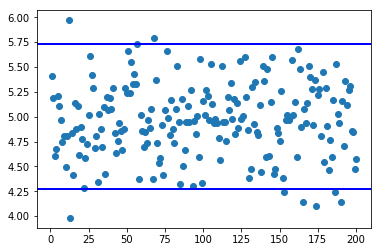

In [19]:
from scipy.stats import uniform
import matplotlib.pyplot as plt
import numpy as np


n = 60 # Anzahl Stichproben
# X_1,...,X_n simulieren und in einer
# n-spaltigen Matrix (mit 200 Zeilen) anordnen
sim = uniform.rvs(size=200*n, loc=0, scale=10)
sim = sim.reshape(200, n)
#In jeder Matrixzeile Mittelwert berechnen
sim_mean = sim.mean(axis=1)
plt.plot(np.arange(1,201,1),sim_mean, 'o')
plt.axhline(y=5.73, linewidth=2, color='b')
plt.axhline(y=4.27, linewidth=2, color='b')

print(np.sum(sim_mean < 4.27) + np.sum(sim_mean > 5.73),' Punkte liegen ausserhalb der Grenze')

((array([-2.70069508, -2.39117927, -2.21476595, -2.08844273, -1.98865134,
         -1.90545091, -1.83366817, -1.77025272, -1.7132485 , -1.66132288,
         -1.61352545, -1.56915347, -1.52767212, -1.48866446, -1.45179889,
         -1.41680716, -1.38346902, -1.35160134, -1.32105008, -1.29168444,
         -1.26339229, -1.23607681, -1.20965371, -1.18404921, -1.1591983 ,
         -1.13504337, -1.11153314, -1.08862177, -1.06626803, -1.04443478,
         -1.02308837, -1.00219826, -0.9817366 , -0.96167793, -0.94199891,
         -0.9226781 , -0.90369573, -0.88503353, -0.86667459, -0.84860322,
         -0.83080482, -0.8132658 , -0.79597346, -0.77891592, -0.76208206,
         -0.74546144, -0.72904425, -0.71282124, -0.69678371, -0.68092342,
         -0.6652326 , -0.64970389, -0.63433029, -0.61910517, -0.60402223,
         -0.58907547, -0.57425918, -0.55956789, -0.5449964 , -0.53053972,
         -0.51619308, -0.50195192, -0.48781183, -0.47376862, -0.45981823,
         -0.44595676, -0.43218046, -0.

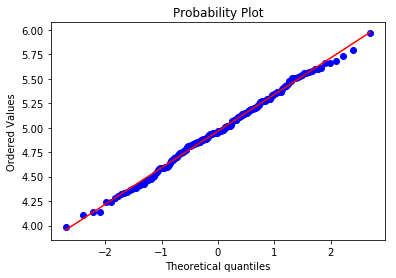

In [20]:
from scipy.stats import probplot
probplot(sim_mean, plot=plt)

# Aufgabe 3

a)

In [24]:
import scipy.stats as st
from scipy.stats import norm
import numpy as np

norm.interval(alpha=0.99, loc=31, scale=6/np.sqrt(10))

(26.112707522188142, 35.887292477811854)

b1) Wird das n 4-mal grösser gewählt, sollte die Breite sich halbieren.

In [28]:
import scipy.stats as st
from scipy.stats import norm
import numpy as np

n10 = norm.interval(alpha=0.99, loc=31, scale=6/np.sqrt(10))
n40 = norm.interval(alpha=0.99, loc=31, scale=6/np.sqrt(40))
diffn10 = n10[1] - n10[0]
diffn40 = n40[1] - n40[0]
print('Die Breite von n = 10 beträgt ', diffn10, '; mit 4n die Breite = ', diffn40)

Die Breite von n = 10 beträgt  9.774584955623713 ; mit 4n die Breite =  4.8872924778118545


b2) Berechnung von z(1-a/2)

In [39]:
z = norm.ppf(0.995)
z

2.5758293035489004

In [40]:
n = (2*z*6)*(2*z*6)
n

955.4251105470547

In [42]:
intervall = norm.interval(alpha=0.99, loc=31, scale=6/np.sqrt(n))
print(intervall)
print('Breite entspricht', intervall[1]-intervall[0])

(30.5, 31.5)
Breite entspricht 1.0


c) Aufgabe a) mit der t-Verteilung da Standardabweichung geschätzt

In [45]:
import scipy.stats as st
from scipy.stats import t
import numpy as np

t.interval(alpha=0.99, df=9, loc=31, scale=6/np.sqrt(10))

(24.833870595963425, 37.166129404036575)